In [1]:
#参考
#http://pongsuke.hatenadiary.jp/entry/2017/05/25/121346

In [75]:
import sys
import cv2
import numpy as np
from pprint import pprint
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

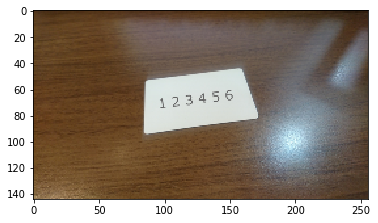

In [92]:
image = cv2.imread('./img/20170525121936.jpg')
# リサイズ
height, width ,depth    = image.shape
image = cv2.resize(image, (int(width/4), int(height/4)))
imageOrg    = image
#show
show_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

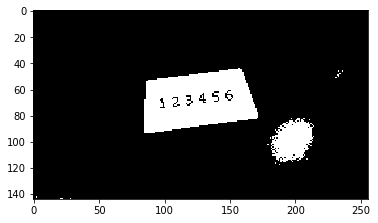

In [93]:
# HSVへ変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

# 白抽出：凄く明るい場所
threashhold_min = np.array([0,0,180], np.uint8)
threashhold_max = np.array([255,255,255], np.uint8)
image = cv2.inRange(image, threashhold_min, threashhold_max)

# BGRへ変換
# inRange で グレースケールされている
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 
#show
show_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

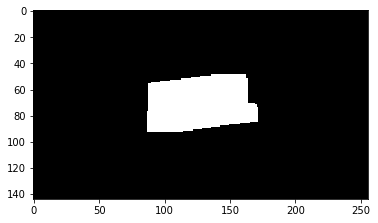

In [94]:
# ノイズ除去
kernel = np.ones((10,26), np.uint8)
image   = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
image   = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#show
# show_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

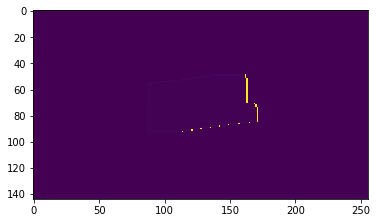

In [95]:
# 反転処理
image   = 255 - image

# 境界抽出
gray_min = np.array([0], np.uint8)
gray_max = np.array([128], np.uint8)
threshold_gray = cv2.inRange(image, gray_min, gray_max)
image, contours, hierarchy = cv2.findContours(threshold_gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#show
# show_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

8


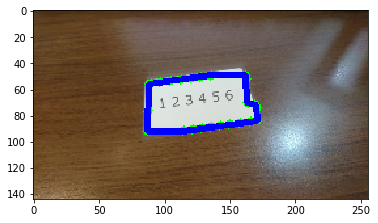

In [96]:

# 最大面積を探す
max_area_contour=-1
max_area    = 0
for contour in contours:
    area=cv2.contourArea(contour)
    if(max_area<area):
        max_area=area
        max_area_contour = contour
# print(max_area_contour)

# カラー化
#image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGBA)

contours    = [max_area_contour]
cv2.drawContours(imageOrg, max_area_contour, -1, (0, 255, 0), 5)

# 輪郭の近似
epsilon = 0.01 * cv2.arcLength(max_area_contour,True)
approx = cv2.approxPolyDP(max_area_contour,epsilon,True)
print(len(approx))
# if len(approx) == 4:
#     cv2.drawContours(imageOrg, [approx], -1, (255, 0, 0), 3)
cv2.drawContours(imageOrg, [approx], -1, (255, 0, 0), 3)
#show
show_img = cv2.cvtColor(imageOrg, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

In [97]:
# ソートが必要かな？
#pprint(approx)
approx= np.sort(approx,axis=1)
approx= np.sort(approx,axis=0)
#pprint(approx)

height, width ,depth    = imageOrg.shape
# 射影変換
pts1 = np.float32(approx)
pts2 = np.float32([[600,200],[300,200],[300,350],[600,350]])
print(pts1.shape)
print(pts2.shape)
M = cv2.getPerspectiveTransform(pts1,pts2)
imageOrg = cv2.warpPerspective(imageOrg,M,(width,height))

#show
show_img = cv2.cvtColor(imageOrg, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

(8, 1, 2)
(4, 2)


error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/imgwarp.cpp:6353: error: (-215) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function getPerspectiveTransform
